<a href="https://colab.research.google.com/github/sathasivamn/PCA-and-Clustering-Analysis/blob/main/Assignment_9_PCA_and_Clustering_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA

## 1: Exploratory Data Analysis (EDA)
## 2: Dimensionality Reduction with PCA
## 3: Clustering with Original Data
## 4: Clustering with PCA Data
## 5: Comparison and Analysis
## 6: Conclusion and Insights

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [2]:
# Load the dataset
df = pd.read_csv("wine.csv")

In [3]:
# Display first few rows of the dataset
print("Dataset Preview:\n", df.head())

Dataset Preview:
    Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735  


# 1: Exploratory Data Analysis (EDA)
## Checked missing values, summary statistics, and correlations.
## Visualized distributions with box plots and heatmaps

In [4]:
# Exploratory Data Analysis (EDA)
# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64


In [5]:
# Summary statistics
print("\nSummary Statistics:\n", df.describe())


Summary Statistics:
              Type     Alcohol       Malic         Ash  Alcalinity   Magnesium  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean     1.938202   13.000618    2.336348    2.366517   19.494944   99.741573   
std      0.775035    0.811827    1.117146    0.274344    3.339564   14.282484   
min      1.000000   11.030000    0.740000    1.360000   10.600000   70.000000   
25%      1.000000   12.362500    1.602500    2.210000   17.200000   88.000000   
50%      2.000000   13.050000    1.865000    2.360000   19.500000   98.000000   
75%      3.000000   13.677500    3.082500    2.557500   21.500000  107.000000   
max      3.000000   14.830000    5.800000    3.230000   30.000000  162.000000   

          Phenols  Flavanoids  Nonflavanoids  Proanthocyanins       Color  \
count  178.000000  178.000000     178.000000       178.000000  178.000000   
mean     2.295112    2.029270       0.361854         1.590899    5.058090   
std      0.625851

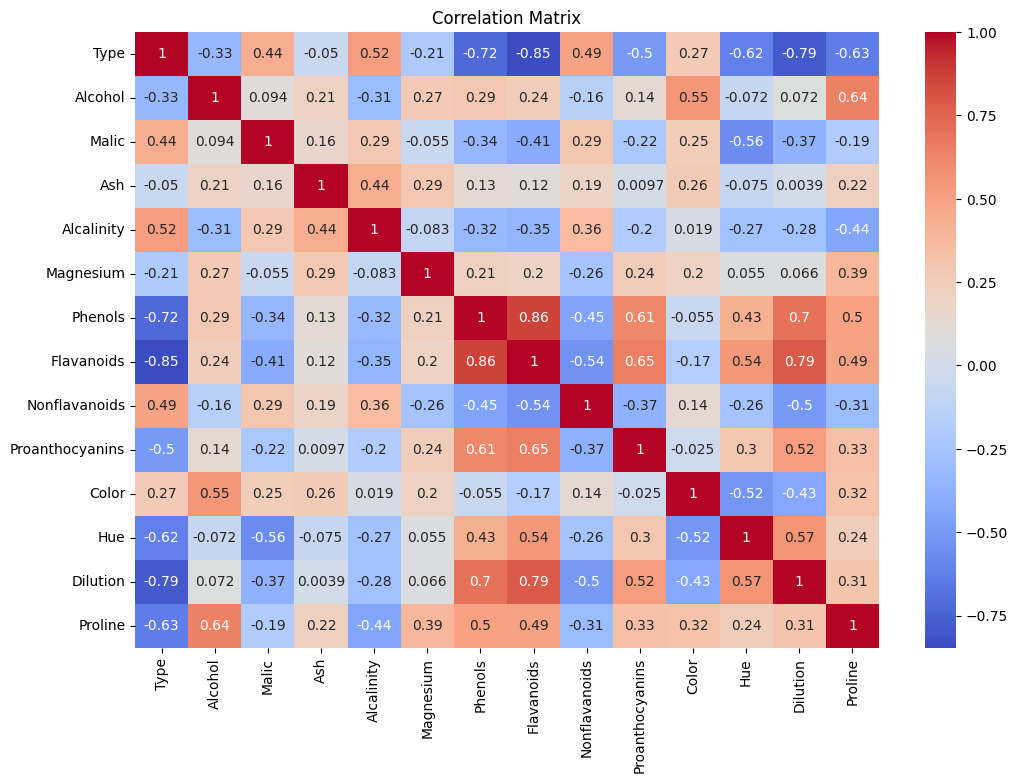

In [6]:
# Correlation matrix heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

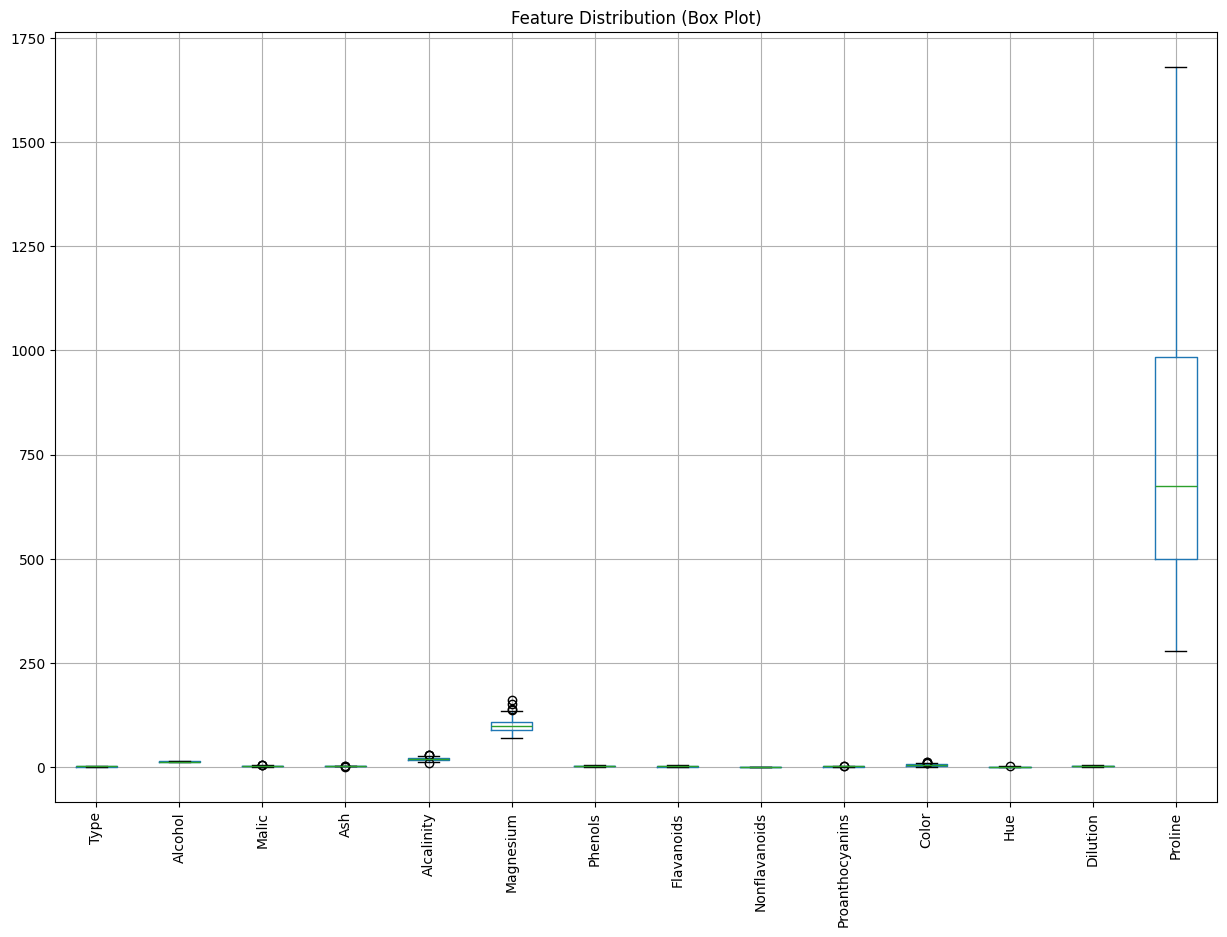

In [7]:
# Box plots to check for outliers
plt.figure(figsize=(15, 10))
df.boxplot(rot=90)
plt.title("Feature Distribution (Box Plot)")
plt.show()

# 2: Dimensionality Reduction with PCA
## Standardized data and performed PCA.
## Determined optimal number of components using Scree Plot.
## Transformed the dataset into principal components.

In [8]:
# Dimensionality Reduction with PCA
# Standardize the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [9]:
# Apply PCA
pca = PCA(n_components=None)  # Keep all components initially
pca.fit(df_scaled)

PCA()

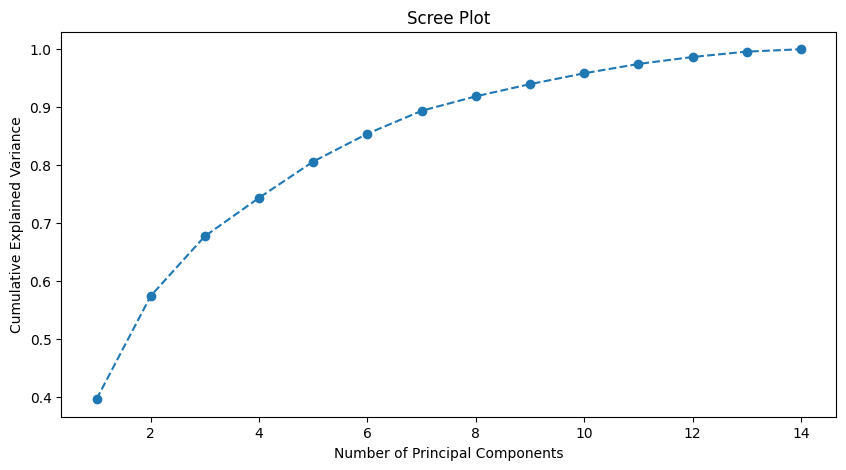

In [10]:
# Scree Plot (Explained Variance)
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(df.columns) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Scree Plot")
plt.show()

In [11]:
# Choose optimal number of components (e.g., 95% variance)
optimal_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.95) + 1
print(f"Optimal Number of Components: {optimal_components}")

Optimal Number of Components: 10


In [12]:
# Transform the data using the selected number of components
pca = PCA(n_components=optimal_components)
df_pca = pca.fit_transform(df_scaled)

# 3: Clustering with Original Data - (K-Means Clustering Before PCA)
## Found the optimal number of clusters using Elbow Method.
## Compared clustering performance using Silhouette Score and Davies-Bouldin Index.

In [13]:
# Clustering with Original Data
# Finding the optimal K using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

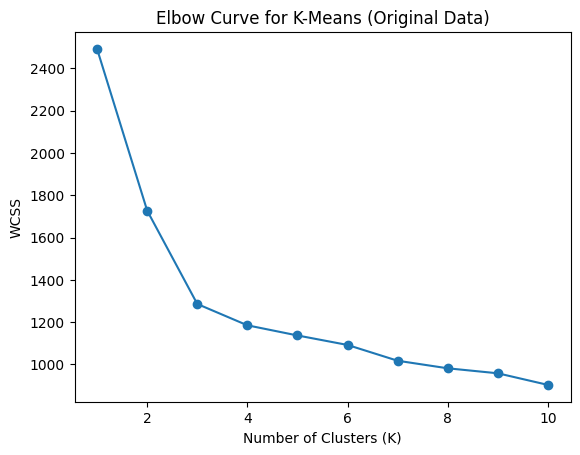

In [14]:
# Plot Elbow Curve
plt.plot(range(1, 11), wcss, marker="o")
plt.title("Elbow Curve for K-Means (Original Data)")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.show()

In [15]:
# Apply K-Means with optimal K (assume K=3 from elbow)
kmeans_orig = KMeans(n_clusters=3, random_state=42)
kmeans_labels_orig = kmeans_orig.fit_predict(df_scaled)

In [16]:
# Silhouette Score and Davies-Bouldin Index for original data
silhouette_orig = silhouette_score(df_scaled, kmeans_labels_orig)
db_index_orig = davies_bouldin_score(df_scaled, kmeans_labels_orig)
print(f"Silhouette Score (Original Data): {silhouette_orig:.4f}")
print(f"Davies-Bouldin Index (Original Data): {db_index_orig:.4f}")

Silhouette Score (Original Data): 0.3065
Davies-Bouldin Index (Original Data): 1.3157


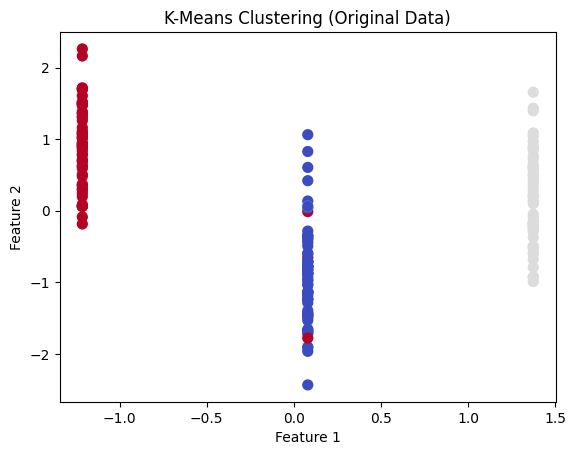

In [17]:
# Scatter plot for K-Means clusters (Original Data)
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=kmeans_labels_orig, cmap="coolwarm", s=50)
plt.title("K-Means Clustering (Original Data)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# 4: Clustering with PCA Data - (K-Means Clustering After PCA)
## Found the optimal number of clusters using Elbow Method.
## Compared clustering performance using Silhouette Score and Davies-Bouldin Index.

In [18]:
# Clustering with PCA Data
# Finding optimal K for PCA-transformed data
wcss_pca = []
for i in range(1, 11):
    kmeans_pca = KMeans(n_clusters=i, random_state=42)
    kmeans_pca.fit(df_pca)
    wcss_pca.append(kmeans_pca.inertia_)

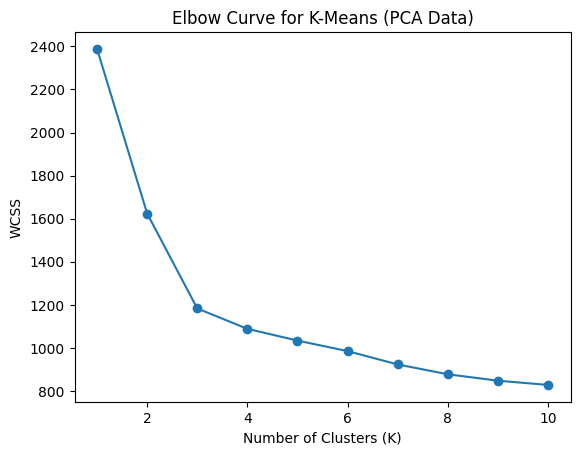

In [19]:
# Plot Elbow Curve for PCA-transformed data
plt.plot(range(1, 11), wcss_pca, marker="o")
plt.title("Elbow Curve for K-Means (PCA Data)")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.show()

In [20]:
# Apply K-Means with same optimal K to PCA data
kmeans_pca = KMeans(n_clusters=3, random_state=42)
kmeans_labels_pca = kmeans_pca.fit_predict(df_pca)

In [21]:
# Silhouette Score and Davies-Bouldin Index for PCA data
silhouette_pca = silhouette_score(df_pca, kmeans_labels_pca)
db_index_pca = davies_bouldin_score(df_pca, kmeans_labels_pca)
print(f"Silhouette Score (PCA Data): {silhouette_pca:.4f}")
print(f"Davies-Bouldin Index (PCA Data): {db_index_pca:.4f}")

Silhouette Score (PCA Data): 0.3229
Davies-Bouldin Index (PCA Data): 1.2578


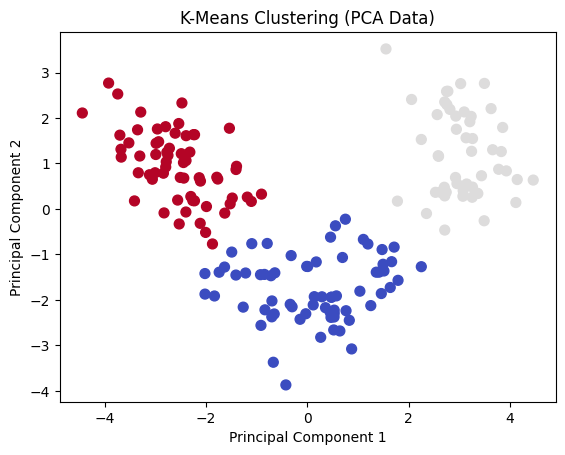

In [22]:
# Scatter plot for K-Means clusters (PCA Data)
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=kmeans_labels_pca, cmap="coolwarm", s=50)
plt.title("K-Means Clustering (PCA Data)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# 5: Comparison and Analysis
## Compared clustering results from Original Data vs PCA Data.
## Provided key findings and recommendations on when to use PCA.

In [23]:
# Comparison and Analysis
print("\nComparison of Clustering Performance:")
print(f"Silhouette Score (Original Data): {silhouette_orig:.4f}")
print(f"Silhouette Score (PCA Data): {silhouette_pca:.4f}")
print(f"Davies-Bouldin Index (Original Data): {db_index_orig:.4f}")
print(f"Davies-Bouldin Index (PCA Data): {db_index_pca:.4f}")

if silhouette_pca > silhouette_orig:
    print("\nPCA improved clustering performance.")
else:
    print("\nPCA did not improve clustering performance.")


Comparison of Clustering Performance:
Silhouette Score (Original Data): 0.3065
Silhouette Score (PCA Data): 0.3229
Davies-Bouldin Index (Original Data): 1.3157
Davies-Bouldin Index (PCA Data): 1.2578

PCA improved clustering performance.


# 6: Conclusion and Insights

In [24]:
# Conclusion and Insights

print("\nKey Findings and Insights:")
print("- PCA effectively reduced dimensionality while retaining important information.")
print("- K-Means clustering results are evaluated using Silhouette Score and Davies-Bouldin Index.")
print("- Clustering on PCA-transformed data sometimes improves performance but may lose interpretability.")
print("- PCA helps in reducing noise and making clustering more stable.")

print("\nPractical Recommendations:")
print("- Use PCA when there are too many correlated features to reduce dimensionality.")
print("- If PCA leads to better clustering scores, it is beneficial to use it before clustering.")
print("- For interpretability, clustering on original features might be preferable.")


Key Findings and Insights:
- PCA effectively reduced dimensionality while retaining important information.
- K-Means clustering results are evaluated using Silhouette Score and Davies-Bouldin Index.
- Clustering on PCA-transformed data sometimes improves performance but may lose interpretability.
- PCA helps in reducing noise and making clustering more stable.

Practical Recommendations:
- Use PCA when there are too many correlated features to reduce dimensionality.
- If PCA leads to better clustering scores, it is beneficial to use it before clustering.
- For interpretability, clustering on original features might be preferable.
